In [ ]:
!pip install transformer_utils

In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='0'

import sys
sys.path.append('../model')
import torch
from transformers import AutoConfig, AutoModelForCausalLM
from modeling_gpt2_rope import GPT2LMHeadModelWithRoPE, GPT2ModelWithRoPE
from configuration_gpt2_rope import GPT2WithRoPEConfig
AutoConfig.register("gpt2-rope", GPT2WithRoPEConfig)
AutoModelForCausalLM.register(GPT2WithRoPEConfig, GPT2LMHeadModelWithRoPE)

In [ ]:
import transformers
path='YOUR_MODEL_PATH'
tokenizer = transformers.AutoTokenizer.from_pretrained(path)

In [3]:
question = "k=1+15\ne=2-k\ns=5-e\nb=22-s\nf=0-b\nf>>"
# question = "k=1+15\ne=2+k\ns=7+e\nb=22+s\nf=3+b\nf>>"

In [4]:
exec(question[:-2])
print(eval(question[-3])%23)
question+=str(eval(question[-3])%23)

20


In [5]:
repr(question)

"'k=1+15\\ne=2-k\\ns=5-e\\nb=22-s\\nf=0-b\\nf>>20'"

In [6]:
def text_to_input_ids(text):
    toks = tokenizer.encode(text)
    return torch.as_tensor(toks).view(1, -1).cuda()

In [7]:
input_ids = text_to_input_ids(question)

input_ids = input_ids[:, :]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [8]:
model = transformers.AutoModelForCausalLM.from_pretrained(path).cuda()

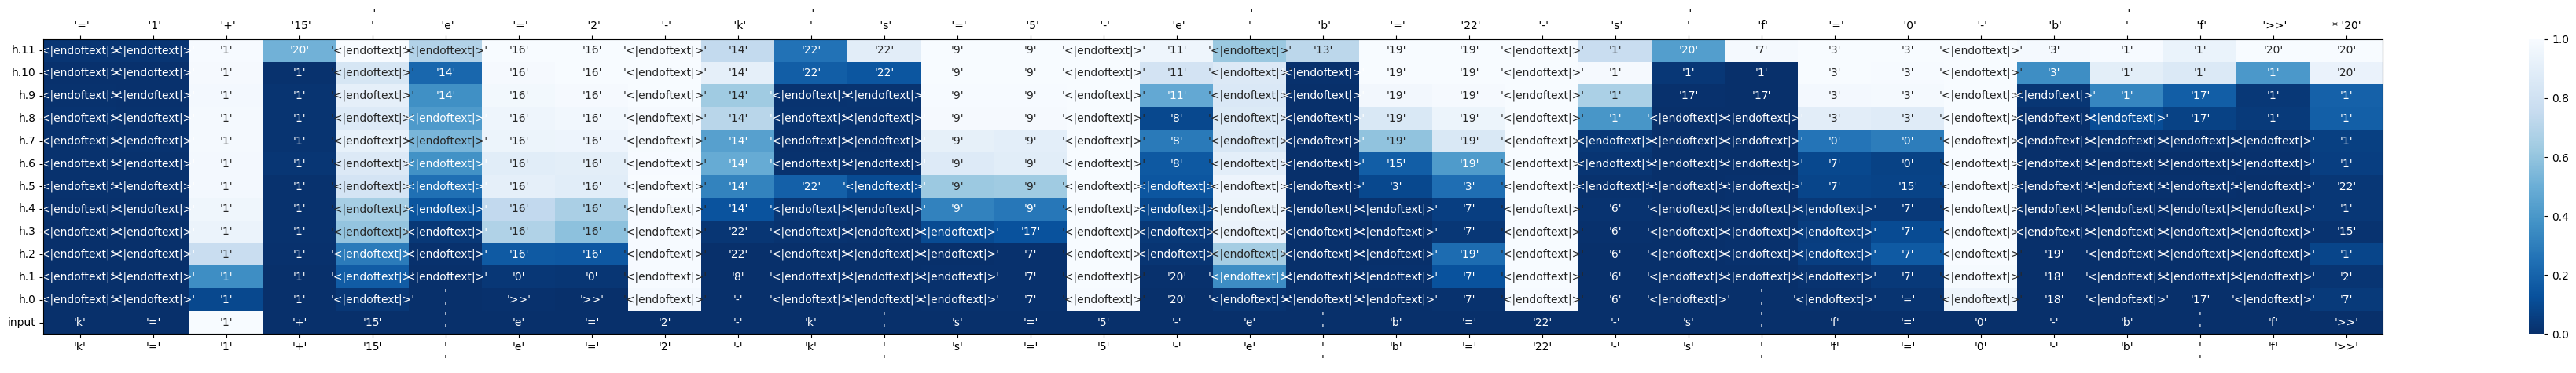

In [9]:
from transformer_utils.logit_lens import plot_logit_lens

plot_logit_lens(model, tokenizer, input_ids, start_ix=0, end_ix=len(input_ids[0])-1, probs=True)

K-L divergence w/r/t the final output distribution.

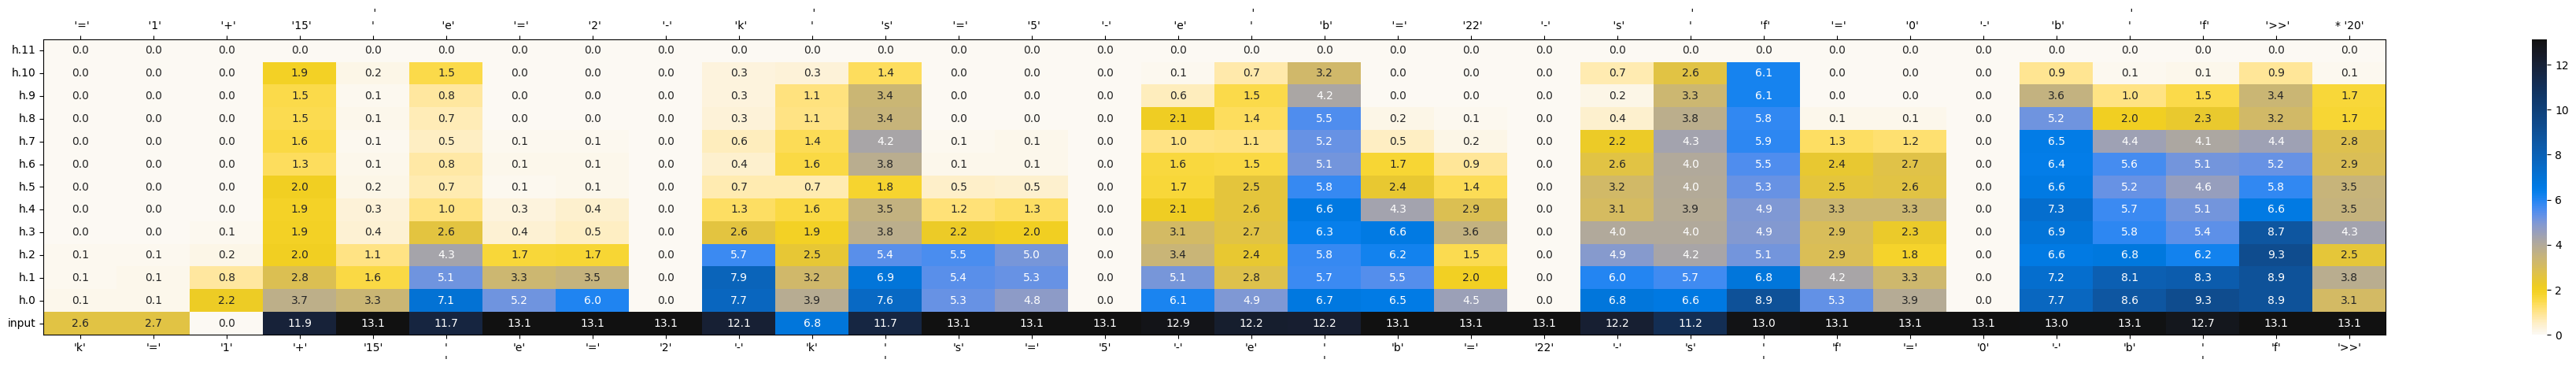

In [10]:
plot_logit_lens(model, tokenizer, input_ids, start_ix=0, end_ix=len(input_ids[0])-1, kl=True)

##### Subblocks

a transformer block is actually 2 residual layers: an attn part followed by an mlp part.

here, we break them down:

- predictions after just the attn part of a block
- predictions after the full block (= after the mlp part too)

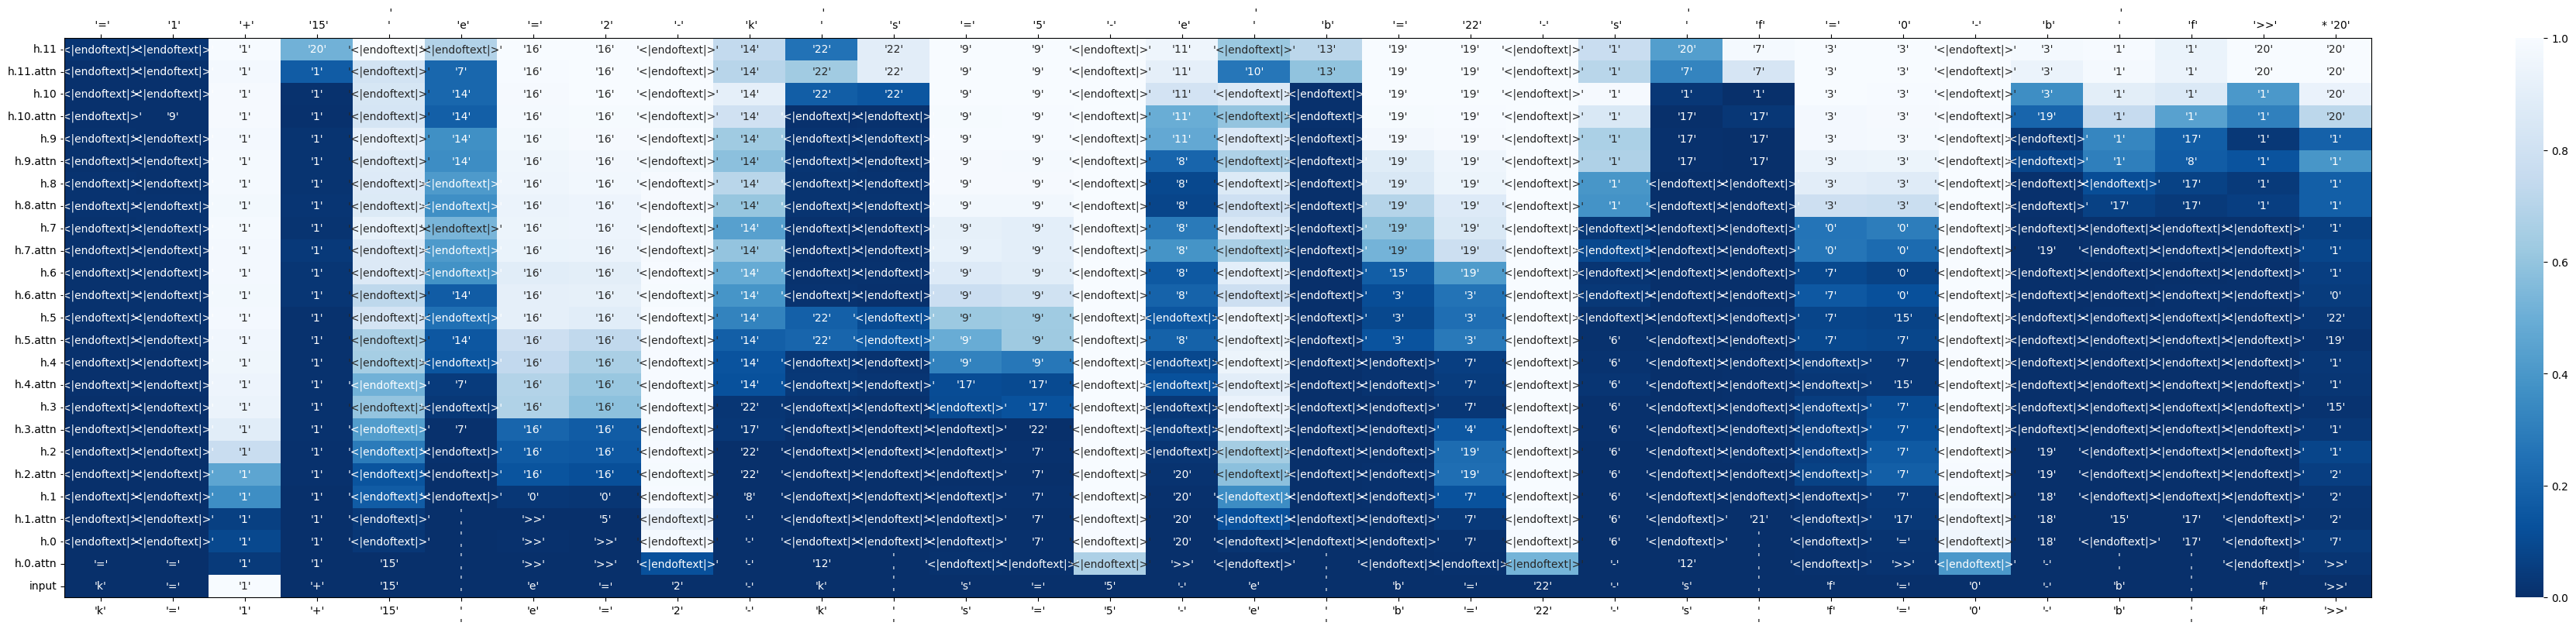

In [11]:
plot_logit_lens(model, tokenizer, input_ids, start_ix=0, end_ix=len(input_ids[0])-1, probs=True, include_subblocks=True)